# Driver Drowsiness Detection

In [1]:
from keras.models import load_model
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from tensorflow import keras
from tensorflow.keras.applications import mobilenet_v2
from tensorflow.keras import preprocessing 
#from tensorflow.keras.applications.resnet50 import ResNet50, decode_predictions, preprocess_input
from tensorflow.keras.preprocessing import image # Keras own inbuild image class
from tensorflow.keras.applications.mobilenet import MobileNet, decode_predictions, preprocess_input

In [2]:
#check whether it works
img_array=cv2.imread("./train_dataset/_1.png",cv2.IMREAD_GRAYSCALE)

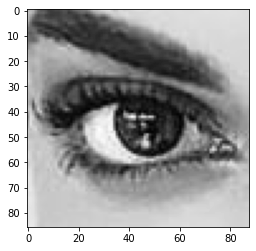

In [3]:
plt.imshow(img_array,cmap="gray")

In [4]:
img_array.shape

(86, 88)

In [5]:

b = image.img_to_array(img_array, dtype = 'uint8')
b.shape

(86, 88, 1)

In [6]:
#Expand dimensions
b = np.expand_dims(b, axis=0)
b.shape

(1, 86, 88, 1)

# Preprocess

In [7]:
backtorgb=cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB) 

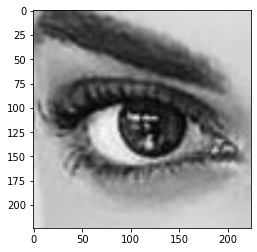

In [8]:
#image resize to 224
img_array_size=224

new_array=cv2.resize(backtorgb,(img_array_size,img_array_size))
plt.imshow(new_array, cmap='gray')
plt.show()

In [9]:
new_array.shape

(224, 224, 3)

In [10]:
new_array= np.expand_dims(new_array, axis=0)
new_array.shape

(1, 224, 224, 3)

# Load Model

In [17]:
# folder names containing images of the things I want to classify
classes = ['Closed', 'Open']
base_path = "./train_dataset/"

In [18]:
# define an image data generator
data_gen = preprocessing.image.ImageDataGenerator(
    # define the preprocessing function that should be applied to all images
    preprocessing_function=mobilenet_v2.preprocess_input,
    # fill_mode='nearest',
     rotation_range=20,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
     horizontal_flip=True, 
     zoom_range=0.2,
    # shear_range=0.2  
    validation_split=0.2
)

In [19]:
#loading the images
train_batches = data_gen.flow_from_directory(directory=base_path,class_mode="categorical", \
target_size=(224,224), classes=classes, batch_size=64,subset='training')

validation_batches = data_gen.flow_from_directory(directory=base_path,class_mode="categorical", \
target_size=(224,224), classes=classes, batch_size=64,subset='validation')

Found 1162 images belonging to 2 classes.
Found 290 images belonging to 2 classes.


In [20]:
classes

['Closed', 'Open']

In [21]:
#check all
all_batches = data_gen.flow_from_directory(directory=base_path,class_mode="categorical", \
target_size=(224,224), classes=classes, batch_size=64,)

Found 1452 images belonging to 2 classes.


In [26]:
# first 30 images , each time you rerun this the next set of 30 images will be displayed
xtrain, ytrain = next(train_batches)
xtrain.shape, ytrain.shape
# first 30 images , each time you rerun this the next set of 30 images will be displayed

((64, 224, 224, 3), (64, 2))

# CNN MODEL

In [36]:
base_model = tf.keras.applications.mobilenet.MobileNet(
    weights='imagenet', 
    alpha=0.25,         # specific parameter of this model, small alpha reduces the number of overall weights
    pooling='avg',      # applies global average pooling to the output of the last conv layer (like a flattening)
    include_top=False,  # !!!!! we only want to have the base, not the final dense layers 
    input_shape=(224, 224, 3)
)

2022-08-08 13:46:29.450655: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [37]:
# freeze it!
base_model.trainable = False

In [38]:
len(classes)

2

In [39]:
#ytrain

In [40]:
model_1 = keras.Sequential()
model_1.add(base_model)
model_1.add(keras.layers.Dense(100, activation='relu'))
model_1.add(keras.layers.Dropout(0.5))
model_1.add(keras.layers.Dense(len(classes), activation='softmax')) #!!! Final layer with a length of 2, and softmax activation 
# have a look at the trainable and non-trainable params statistic
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_0.25_224 (Functio  (None, 256)              218544    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 100)               25700     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 202       
                                                                 
Total params: 244,446
Trainable params: 25,902
Non-trainable params: 218,544
_________________________________________________________________


# Compile and train

In [41]:
#model_1.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
             # loss=keras.losses.categorical_crossentropy,
              #metrics=[keras.metrics.categorical_accuracy])

# observe the validation loss and stop when it does not improve after 3 iterations
#callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

#model_1.fit(train_batches,validation_data=validation_batches,
          #epochs=10, 
          #verbose=1,
          #callbacks=[callback])
          # use 30% of the data for validation)

# use it to predict

In [42]:
#model = load_model('./model_1.h5')

In [43]:

imgg= cv2.imread("./train_dataset/Open/_8.jpg",cv2.IMREAD_GRAYSCALE)
#img_array=cv2.imread("./train_dataset/_1.png",cv2.IMREAD_GRAYSCALE)
#img_array=cv2.imread("./train_dataset/Closed/_0.jpg",)

In [44]:
imgg=preprocess_input(imgg)

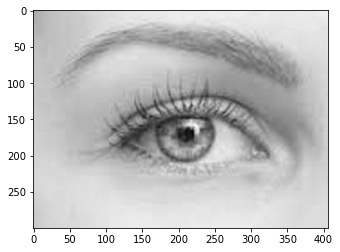

In [45]:
plt.imshow(imgg,cmap="gray")


In [46]:
imgg.size

122100

In [47]:
a = image.img_to_array(imgg, dtype = 'uint8')
a.shape

(300, 407, 1)

In [48]:
a = np.expand_dims(a, axis = 0)

In [49]:
a.shape

(1, 300, 407, 1)

In [50]:
backtorgb=cv2.cvtColor(imgg,cv2.COLOR_GRAY2RGB)

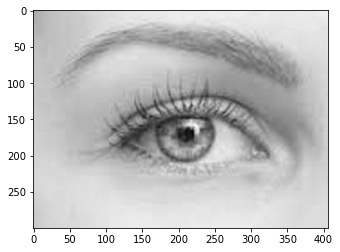

In [51]:
img_size=224

new_img_1=cv2.resize(backtorgb,(img_size,img_size))
plt.imshow(imgg, cmap='gray')
plt.show()

In [52]:
new_img_1.shape
#new_array.shape


(224, 224, 3)

In [53]:
new_img_1= np.expand_dims(new_img_1, axis = 0)

In [54]:
new_img_1.shape

(1, 224, 224, 3)

In [55]:
model_1 = load_model('./model_1.h5')

In [56]:
model_1.predict(new_img_1)

1/1 [==============================] - 0s 469ms/step


array([[1.7184431e-04, 9.9982810e-01]], dtype=float32)

In [57]:
model_1.predict(new_img_1)[0].round(decimals = 3)

1/1 [==============================] - 0s 32ms/step


array([0., 1.], dtype=float32)

In [58]:
if model_1.predict(new_img_1).argmax() ==1:
    print('open eyes')
else:
    print('closed eyes')

1/1 [==============================] - 0s 26ms/step
open eyes


In [59]:
classes

['Closed', 'Open']

1/1 [==============================] - 0s 32ms/step


<BarContainer object of 2 artists>

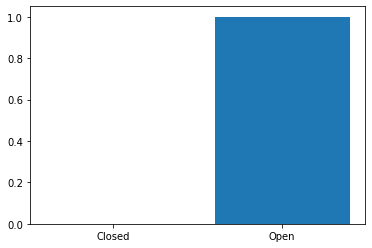

In [60]:
plt.bar(x = classes, height = model_1.predict(new_img_1)[0])

In [61]:
model_1.save('./model_1.h5')

# Deep learning model for training

In [62]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers

In [63]:
#model=tf.keras.applications.mobilenet.MobileNet()

In [64]:
#model.summary()

# Checking the network for predictions

In [81]:
img_array_1=cv2.imread('./train_dataset/_2.png',cv2.IMREAD_GRAYSCALE)

In [82]:
backtorgb=cv2.cvtColor(img_array_1,cv2.COLOR_GRAY2RGB)

In [83]:
img_array_1_size=224
new_array_2=cv2.resize(backtorgb, (img_array_1_size,img_array_1_size))                     

In [84]:
X_input=np.array(new_array_2).reshape(1,img_array_1_size, img_array_1_size,3)

In [85]:
X_input.shape

(1, 224, 224, 3)

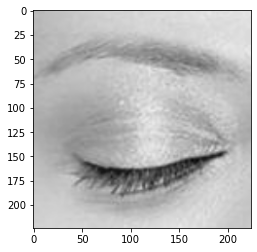

In [86]:
plt.imshow(new_array_2)

In [87]:
X_input=X_input/255.0

In [88]:
prediction=model_1.predict(X_input)

1/1 [==============================] - 0s 30ms/step


In [89]:
prediction

array([[9.9980968e-01, 1.9039935e-04]], dtype=float32)

# check whether it works 

In [90]:
img_1=cv2.imread('./train_dataset/sadwoman_1.png')

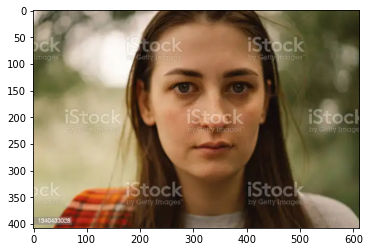

In [91]:
plt.imshow(cv2.cvtColor(img_1,cv2.COLOR_BGR2RGB))

In [92]:
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

In [93]:
eye_cascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye.xml')

In [94]:
gray=cv2.cvtColor(img_1,cv2.COLOR_BGR2GRAY)

In [95]:
eyes=eye_cascade.detectMultiScale(gray,1.1,4)

In [96]:
for(x,y,w,h) in eyes:
    cv2.rectangle(img_1,(x,y),(x+w,y+h),(0,255,0),2)

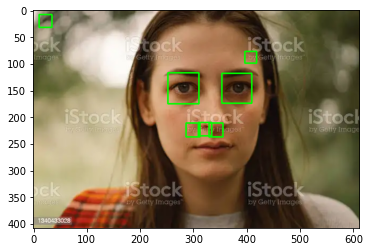

In [97]:
plt.imshow(cv2.cvtColor(img_1,cv2.COLOR_BGR2RGB))

# cropping the eye image

In [98]:
eye_cascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye.xml')
gray=cv2.cvtColor(img_1,cv2.COLOR_BGR2GRAY)
#print (facecascade.empty())
eyes=eye_cascade.detectMultiScale(gray,1.1,4)
for (x,y,w,h) in eyes: 
    roi_gray=gray[y:y+h,x:x+w]
    roi_color=img_1[y:y+h,x:x+w]
    eyess=eye_cascade.detectMultiScale(roi_gray)
    if len(eyess)==0:
        print("eyes are not detected")
    else:
        for (ex,ey,ew,eh)in eyess:
            eyes_roi=roi_color[ey:ey+eh, ex:ex+ew]
            

eyes are not detected
eyes are not detected


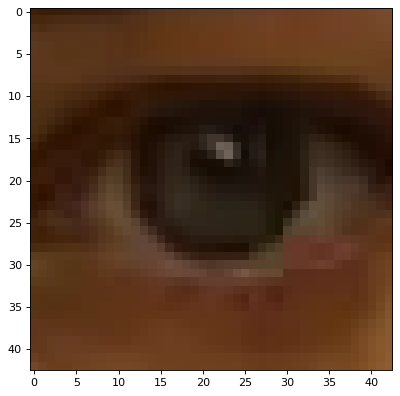

In [99]:
#from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))


In [100]:
eyes_roi.shape

(43, 43, 3)

In [101]:
final_image=cv2.resize(eyes_roi, (224,224))
final_image=np.expand_dims(final_image,axis=0)#need fourth dimension
final_image=final_image/255.0

In [102]:
final_image.shape

(1, 224, 224, 3)

In [103]:
model_1.predict(final_image)

1/1 [==============================] - 0s 33ms/step


array([[0.023764  , 0.97623605]], dtype=float32)

1/1 [==============================] - 0s 34ms/step


<BarContainer object of 2 artists>

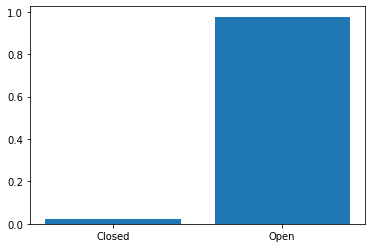

In [104]:

plt.bar(x = classes, height = model_1.predict(final_image)[0])

# Realtime Video Demo first detect that eyes are closed or open and generate alarm


In [105]:
import pygame

pygame 2.1.2 (SDL 2.0.18, Python 3.9.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [ ]:
pygame.mixer.init()
pygame.mixer.music.load('alarm.wav')
pygame.mixer.music.set_volume(0.8)

import numpy as np
import cv2

img_1=cv2.imread('./train_dataset/sadwoman_1.png')
path="haarcascade_frontalface_default.xml "
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
eye_cascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye_tree_eyeglasses.xml')
font= cv2.FONT_HERSHEY_SIMPLEX
cap=cv2.VideoCapture(0)

counter=0    
while True:
    ret,frame=cap.read()
    eye_cascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye_tree_eyeglasses.xml')
    gray=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #print (facecascade .empty())
    eyes=eye_cascade.detectMultiScale(gray,1.1,4)
    for (x,y,w,h) in eyes: 
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=frame[y:y+h,x:x+w]
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
        eyess=eye_cascade.detectMultiScale(roi_gray)
        if len(eyess)==0:
            print("eyes are not detected")
        else:
            for (ex,ey,ew,eh)in eyess:
                eyes_roi=roi_color[ey:ey+eh, ex:ex+ew]
            
        
    gray=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) 
    print (faceCascade.empty())
    faces=faceCascade.detectMultiScale(gray,1.1,4)
    
    #Draw a rectangle around the faces
    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
    font= cv2.FONT_HERSHEY_SIMPLEX
    
    #use putText() method for
    #inserting text on video
    
    final_image=cv2.resize(eyes_roi,(224,224))
    final_image=np.expand_dims(final_image,axis=0)#need fourth dimension
    final_image=final_image/255.0    
    
    Predictions=model_1.predict(final_image)
    if Predictions.argmax() ==1:
            status='open eyes'
            cv2.putText(frame,
                status,
                (150,150),
                font, 3,
                (0, 255, 0),
                2,
                cv2.LINE_4)
        
            x1,y1,w1,h1=0,0,175,75
        
        #Draw blackbackground rectangle
        
            cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
        #Add text
            cv2.putText(frame,'Active',(x1+int(w1/10),y1+int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,255,0),2)  
    
    else:
        counter=counter+1 
        status="closed Eyes"
        cv2.putText(frame, status,(150,150), font, 3, (0, 0, 255), 2, cv2.LINE_4)
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255),2)
        if counter>2:
                
                x1,y1,w1,h1=0,0,175,75  
                #Draw black background rectangle
                cv2.rectangle(frame,(x1,x1),(x1+w1,y1+h1),(0,0,0),-1)
                #Add text    
                cv2.putText(frame,'Sleep Alert!',(x1+int(w1/10),y1+int(h1/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,255),2)  
               
                pygame.mixer.music.play()
                counter=0

             
                
     
    cv2.imshow('Drowsiness Detection',frame)
    if cv2.waitKey(2) & 0xFF==ord('q'):
        break
             
cap.release()
cv2.destroyAllWindows()

False
1/1 [==============================] - 0s 20ms/step
False
1/1 [==============================] - 0s 22ms/step
eyes are not detected
False
1/1 [==============================] - 0s 26ms/step
False
1/1 [==============================] - 0s 22ms/step
False
1/1 [==============================] - 0s 20ms/step
False
1/1 [==============================] - 0s 19ms/step
False
1/1 [==============================] - 0s 23ms/step
False
1/1 [==============================] - 0s 34ms/step
False
1/1 [==============================] - 0s 19ms/step
False
1/1 [==============================] - 0s 21ms/step
False
1/1 [==============================] - 0s 20ms/step
eyes are not detected
False
1/1 [==============================] - 0s 20ms/step
False
1/1 [==============================] - 0s 19ms/step
False
1/1 [==============================] - 0s 20ms/step
eyes are not detected
False
1/1 [==============================] - 0s 20ms/step
eyes are not detected
False
1/1 [==============================]

In [ ]:
import cv2
img_1=cv2.imread('./train_dataset/sadwoman_1.png')
path="haarcascade_frontalface_default.xml "
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
eye_cascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye.xml')
font= cv2.FONT_HERSHEY_SIMPLEX
cap=cv2.VideoCapture(0)
    
while True:
    ret,frame=cap.read()
    eye_cascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye.xml')
    gray=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    print (faceCascade.empty())
    eyes=eye_cascade.detectMultiScale(gray,1.1,4)
    for (x,y,w,h) in eyes: 
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=frame[y:y+h,x:x+w]
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
        eyess=eye_cascade.detectMultiScale(roi_gray)
        if len(eyess)==0:
            print("eyes are not detected")
        else:
            for (ex,ey,ew,eh) in eyess:
                eyes_roi=roi_color[ey:ey+eh, ex:ex+ew]
            
    final_image=cv2.resize(eyes_roi,(224,224))
    #final_image=final_image.reshape(24,24,-1)
    final_image=np.expand_dims(final_image,axis=0)#need fourth dimension
    final_image=final_image/255.0    
    
    Predictions=model_1.predict(final_image)
    if Predictions.argmax() ==1:
            status='open eyes'
    else:
            status='closed eyes'
        
    gray=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  
    print(faceCascade.empty())
    faces=faceCascade.detectMultiScale(gray,1.1,4)
    
    #Draw a rectangle around the faces
    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
        
        
    
    #Use putTExt()method for
   # inserting text on video
    cv2.putText(frame,  status,(50,50), font, 3, (0, 0, 255),  2, cv2.LINE_4)
    cv2.imshow('Drowsiness Detection',frame)
                
    #if cv2.waitKey(2) & 0xFF==ord('q'):
        #break
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break      
cap.release()
cv2.destroyAllWindows()
                



   